In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# loading data
data = np.loadtxt('data2.txt',delimiter=',')
print(data.shape)
num_feature = data.shape[1] - 1
data = data.astype('float32')
print(data)

(100, 3)
[[34.62366  78.0247    0.      ]
 [30.28671  43.894997  0.      ]
 [35.84741  72.9022    0.      ]
 [60.1826   86.308556  1.      ]
 [79.03274  75.344376  1.      ]
 [45.08328  56.316372  0.      ]
 [61.106663 96.51143   1.      ]
 [75.02474  46.554012  1.      ]
 [76.098785 87.42057   1.      ]
 [84.43282  43.533394  1.      ]
 [95.86156  38.225277  0.      ]
 [75.01366  30.603264  0.      ]
 [82.30705  76.481964  1.      ]
 [69.364586 97.71869   1.      ]
 [39.538338 76.03681   0.      ]
 [53.97105  89.20735   1.      ]
 [69.070145 52.74047   1.      ]
 [67.94685  46.678574  0.      ]
 [70.66151  92.92714   1.      ]
 [76.97878  47.575962  1.      ]
 [67.372025 42.83844   0.      ]
 [89.67677  65.79936   1.      ]
 [50.53479  48.855812  0.      ]
 [34.212063 44.20953   0.      ]
 [77.924095 68.97236   1.      ]
 [62.271015 69.95446   1.      ]
 [80.19018  44.82163   1.      ]
 [93.11439  38.80067   0.      ]
 [61.830208 50.256107  0.      ]
 [38.785805 64.99568   0.      ]
 

In [3]:
# data normalization
data_ori = data.copy()
maximum = np.max(data[:, :num_feature],axis=0,keepdims=True)
minimun = np.min(data[:, :num_feature],axis=0,keepdims=True)
data[:, :num_feature] = (data[:, :num_feature] - minimun)/(maximum - minimun)

In [4]:
# train val split
data_train, data_test = train_test_split(data, test_size=0.3, random_state=42)
X_train = data_train[:, :2]
X_train = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
y_train = data_train[:, 2].reshape(-1,1)
X_test = data_test[:, :2]
X_test = np.concatenate((X_test, np.ones((X_test.shape[0],1))), axis=1)
y_test = data_test[:, 2].reshape(-1,1)

In [9]:
# model init
w = np.zeros((num_feature+1,1))
print(w)

def cross_entropy_loss(y_pred,y):
    return -np.mean(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

iterations = 10000
lr = 0.1

[[0.]
 [0.]
 [0.]]


In [11]:
log = []
# gradient descent
print(X_train, w)
for i in range(iterations):
    y_pred = sigmoid(np.matmul(X_train, w))
    g = lr*np.mean((y_pred-y_train)*X_train, axis=0).reshape(-1,1)
    w -= g
    loss = cross_entropy_loss(y_pred,y_train)
    if i % 100 == 0:
        print('iter:{},loss:{}'.format(i,loss))
    log.append([i,loss])
    y_pred_test = sigmoid(np.matmul(X_test, w))
    loss = cross_entropy_loss(y_pred_test,y_test)
#     print('iter:{},val_loss:{}'.format(i,loss))


[[0.64433789 0.         1.        ]
 [0.97052765 0.82214302 1.        ]
 [0.55052644 0.80553865 1.        ]
 [0.45537946 0.28788552 1.        ]
 [0.63687092 0.79456443 1.        ]
 [0.21534562 0.37665957 1.        ]
 [0.14904502 0.98045516 1.        ]
 [0.52318448 0.15364614 1.        ]
 [0.35225201 0.31656414 1.        ]
 [0.5591495  0.32427782 1.        ]
 [0.88156801 0.8509782  1.        ]
 [0.14588234 0.59421057 1.        ]
 [0.6444968  0.23365523 1.        ]
 [0.76581746 0.26040751 1.        ]
 [0.90377581 0.12008007 1.        ]
 [0.67250407 0.24862531 1.        ]
 [0.9284302  0.22106177 1.        ]
 [0.46169755 0.57643771 1.        ]
 [0.37545303 0.12683012 1.        ]
 [0.56336975 0.98314321 1.        ]
 [0.68605322 0.56205136 1.        ]
 [0.43176425 0.81600136 1.        ]
 [0.5430494  0.23547986 1.        ]
 [0.64112151 0.16069672 1.        ]
 [0.65989107 0.83229077 1.        ]
 [0.43567654 0.17439301 1.        ]
 [0.44500887 0.96545857 1.        ]
 [0.20939718 0.52510375 1.  

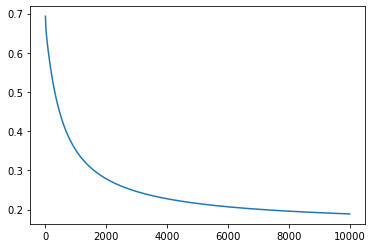

In [7]:
# loss curve visualization
log = np.array(log)
plt.plot(log[:,0],log[:,1])

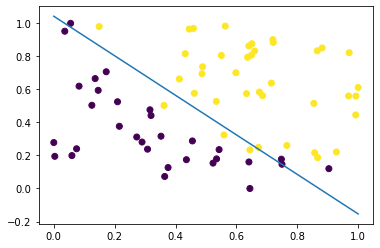

In [13]:
# visualization
plt.scatter(X_train[:,0],X_train[:,1],c=y_train.flatten())
x = np.linspace(0,1,10)
y = (- w[0]*x - w[2])/w[1]
plt.plot(x, y)
